# Bikes Dataset Visualization

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('bikes.csv')

In [4]:
df['Profit'] = (df['registered']*5 + df['casual']*20)*0.86-(1500/(365*24))
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,107.328767
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,275.028767
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,201.928767
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,94.428767
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,4.128767
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,1534.928767
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,1165.128767
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,773.828767
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,709.328767


## Distrbution Plots

### Univariate Plots

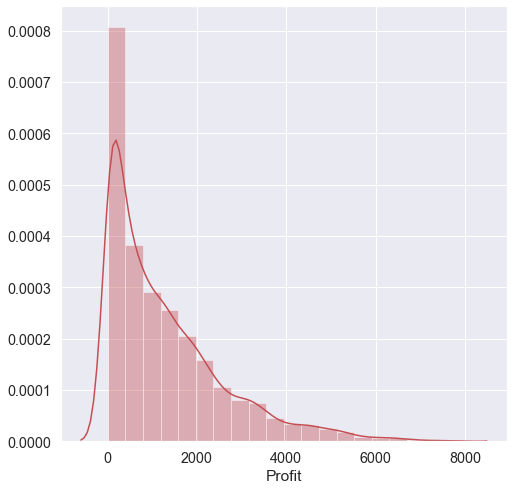

In [37]:
sns.distplot(df['Profit'], color='r', bins=20)
sns.set(rc={'figure.figsize':[8,8]},font_scale=1.3)

#### The profit is skewed to the right

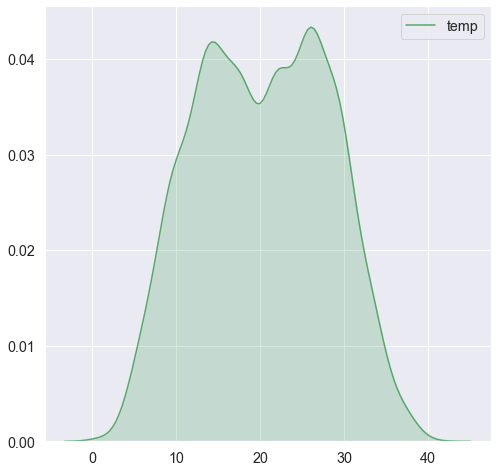

In [36]:
sns.kdeplot(df['temp'], color='g', shade=True)
sns.set(rc={'figure.figsize':[8,8]},font_scale=1.3)

#### Tempruture feature is Bimodal distrubtion

### Bivariate plots

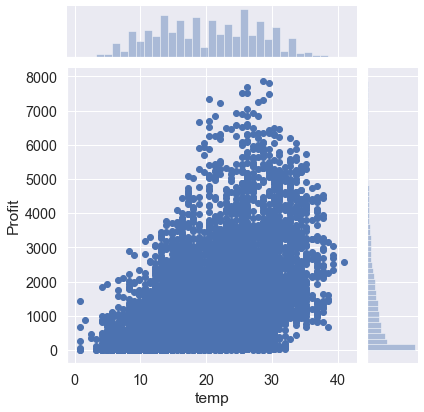

In [38]:
sns.jointplot(df['temp'],df['Profit'])

#### There is a low positive realtionship between the profit and temp

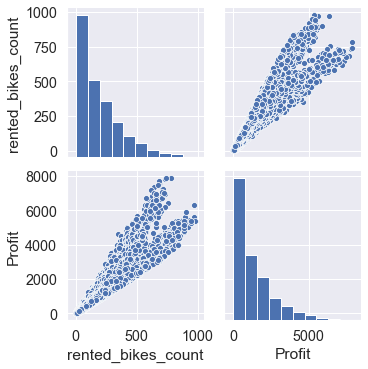

In [47]:
sns.pairplot(df, vars=['rented_bikes_count','Profit'])

#### There is a strong positive relationship between the profit and rented bikes

### Categorical Plots

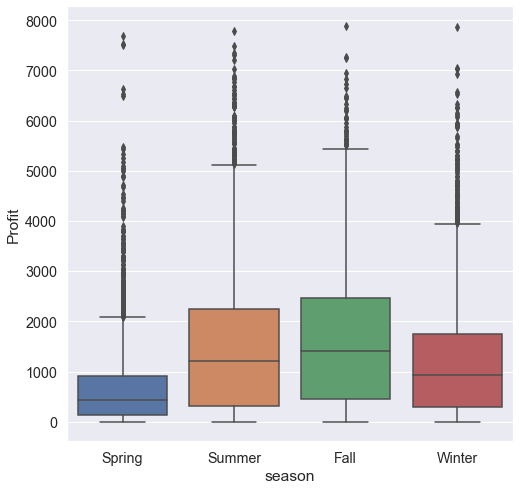

In [49]:
sns.boxplot(x='season', y='Profit', data=df)

#### Outliers detected for all the categories and the fall season has the largest median profit and the spring season is skewed to the right, while the other categories are normally distrbuted

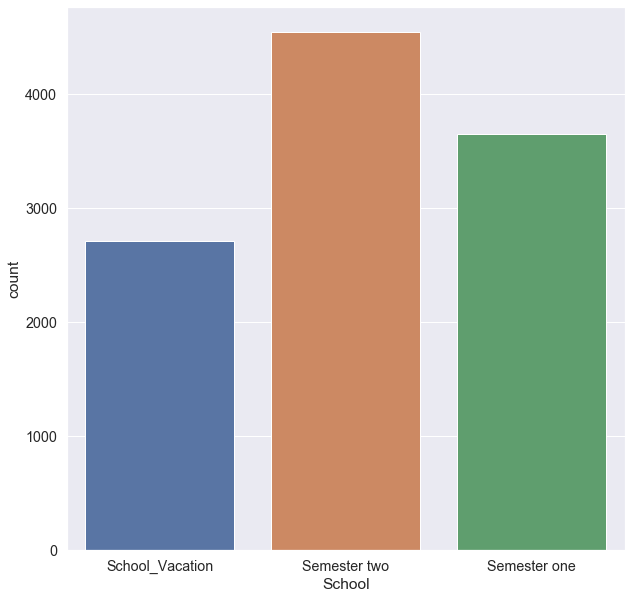

In [77]:
sns.countplot(x='School', data=df)
sns.set(rc={'figure.figsize':[10,10]},font_scale=1.3)

In [74]:
def School_Period(x):
    if x in range(9,13):
        return "Semester one"
    elif x in range(2,7):
        return "Semester two"
    else:
        return "School_Vacation"
df['School']=df['month'].apply(School_Period)

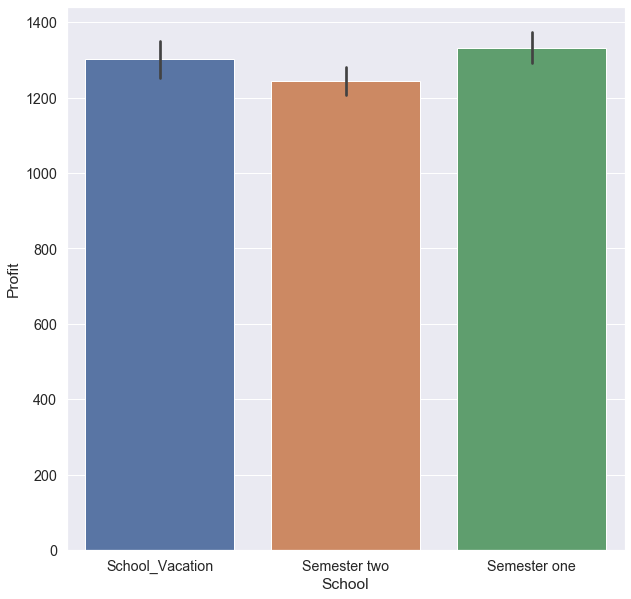

In [79]:
sns.barplot(x='School',y='Profit',data=df)

#### The highest mean of profit is achieved at semester one of school (from sep to dec)

## Heat Map

In [87]:
df['datetime']=pd.to_datetime(df['datetime'],format='%Y-%m-%d %H:%M:%S',errors='coerce')

In [86]:
df['hour']=df['datetime'].dt.hour
df['day']=df['datetime'].dt.day
df['month']=df['datetime'].dt.month
df['year']=df['datetime'].dt.year
df['week']=df['datetime'].dt.week
df['dayname']=df['datetime'].dt.day_name()

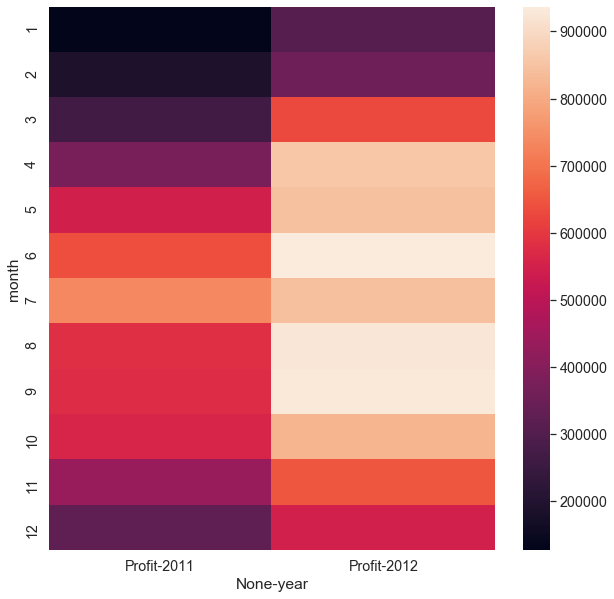

In [83]:
import numpy as np
pivot=pd.pivot_table(df,index=['month'],columns=['year'],aggfunc={'Profit':np.sum})
sns.heatmap(pivot)

#### The largest profit is achieved in 2012 in months 6,8 and 9

# Loans Dataset Visualization

In [3]:
import pandas as pd
df1=pd.read_csv('loan_data.csv')
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


#### The probability denisty of the loan amount

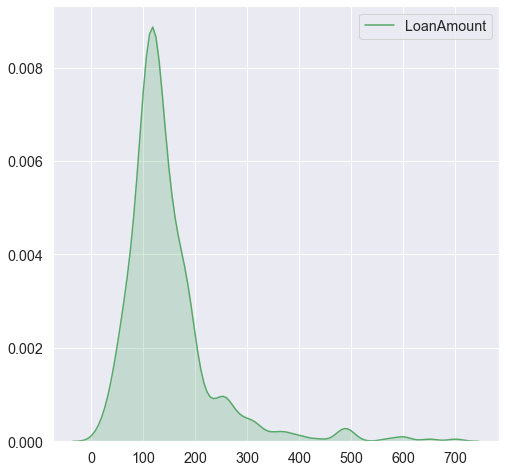

In [9]:
sns.kdeplot(df1['LoanAmount'], color='g', shade=True)
sns.set(rc={'figure.figsize':[8,8]},font_scale=1.3)

### Count Plot for the Gender

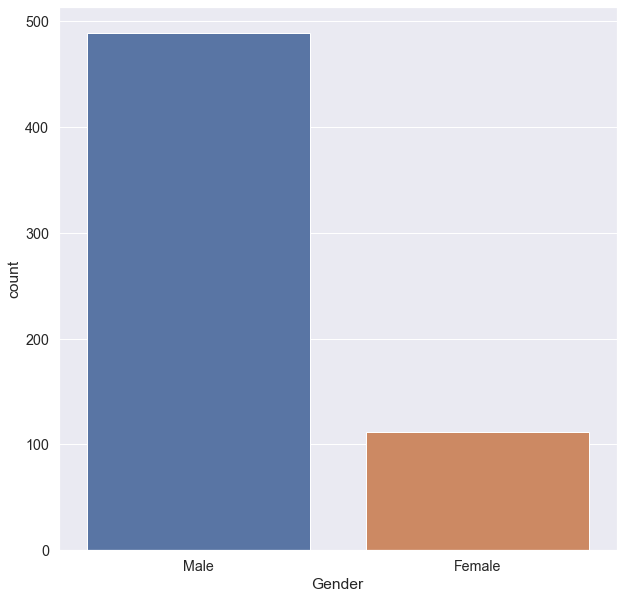

In [54]:
sns.countplot(x='Gender', data=df1)

#### The number of males who ask for loans are greater than females

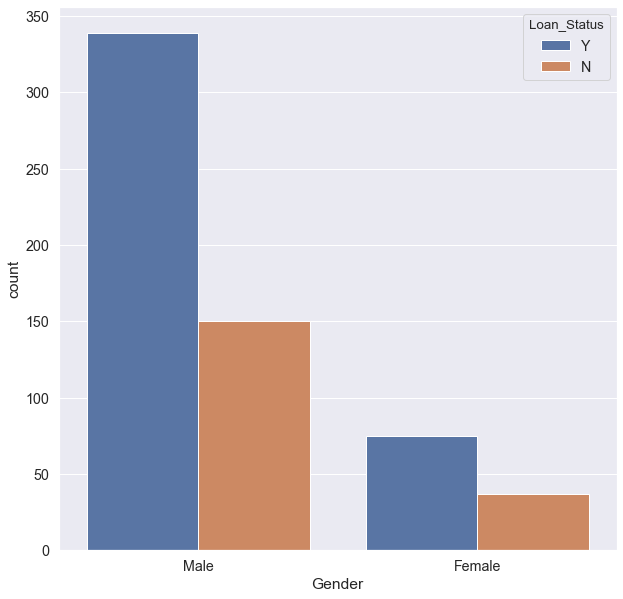

In [55]:
sns.countplot(x='Gender', hue='Loan_Status', data=df1)

#### This bar chart show the count of male and female that have rejected and accepted loans
#### The number of accepted loans is larger than the number of rejected loans for both males and females

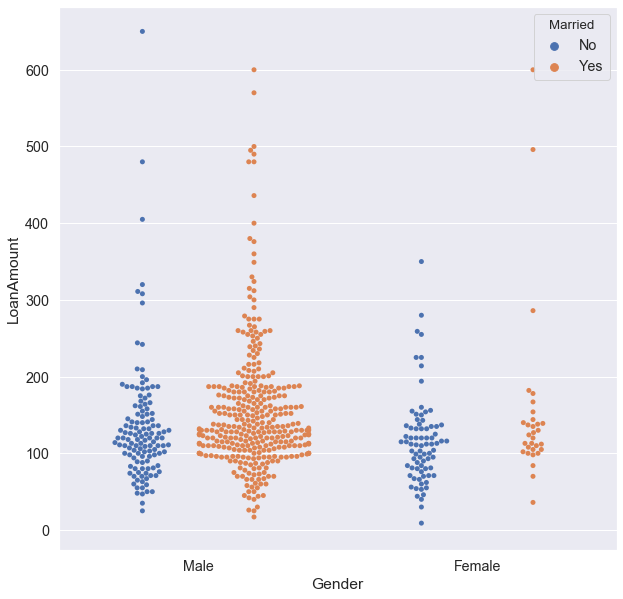

In [37]:
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)
sns.swarmplot(x='Gender',y='LoanAmount',data=df1, hue='Married', dodge=True)

#### A comparison between The distrubtion of loan amount for the gender feature for those who married and those who are un-married 
#### Outliers detected of loanamount for both married and unmarried males and females. The married males are the categories with largest data and the highes loan amount was for un-married male

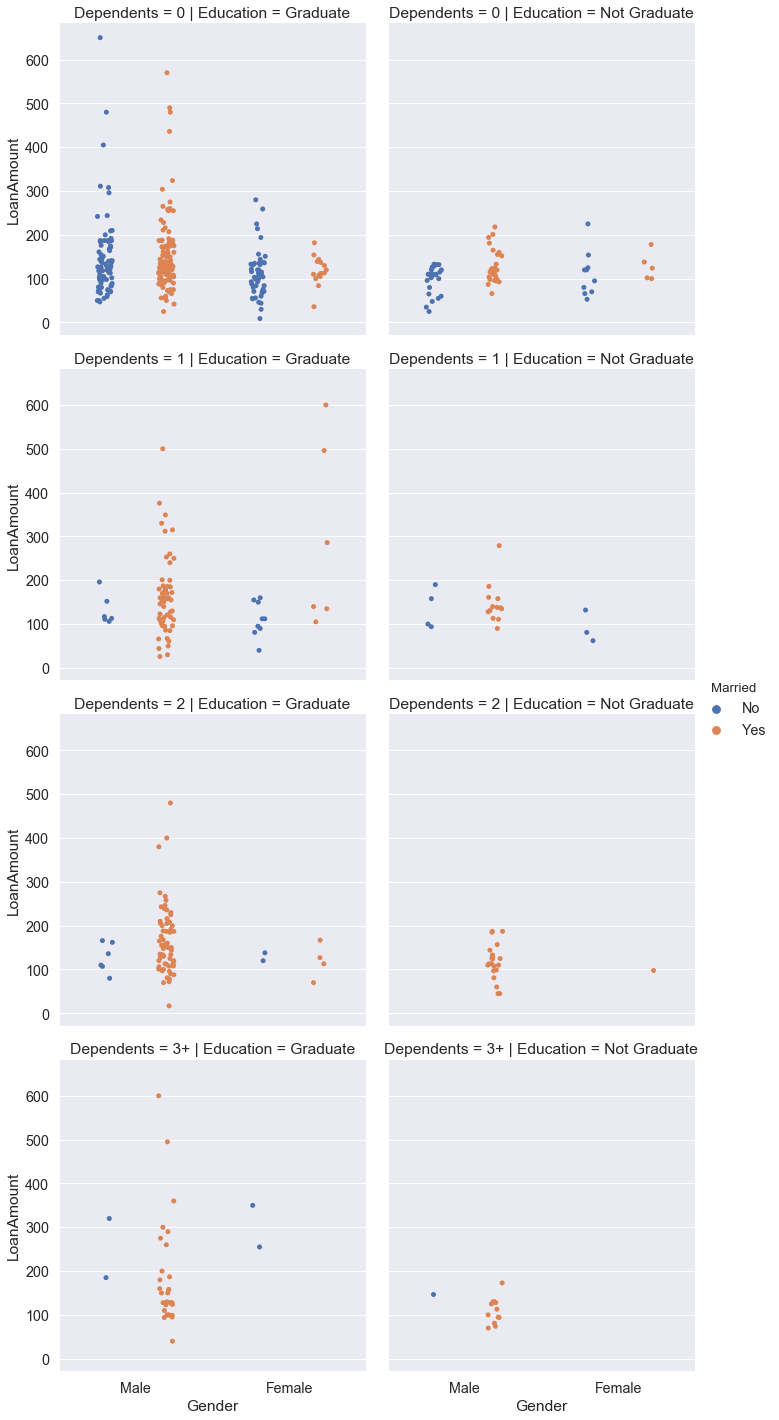

In [40]:
sns.catplot(x='Gender',y='LoanAmount',data=df1,kind='strip',hue='Married',dodge=True,col='Education',row='Dependents')

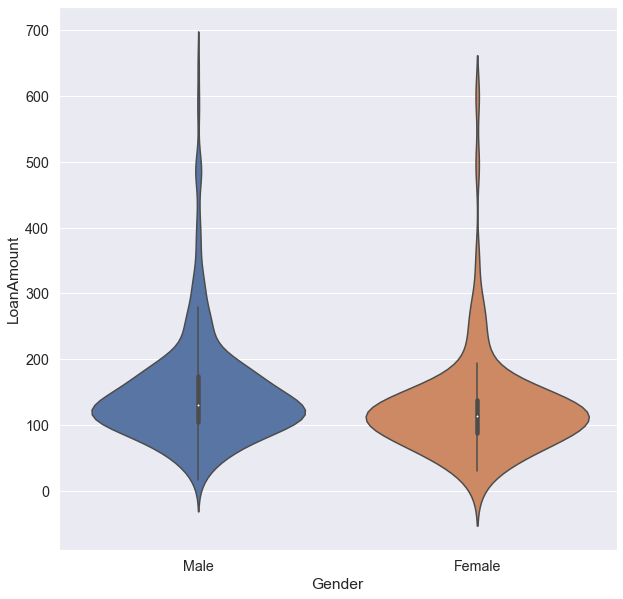

In [43]:
sns.violinplot(x='Gender',y='LoanAmount',data=df1)

#### The distrbution of loan amount for males and females

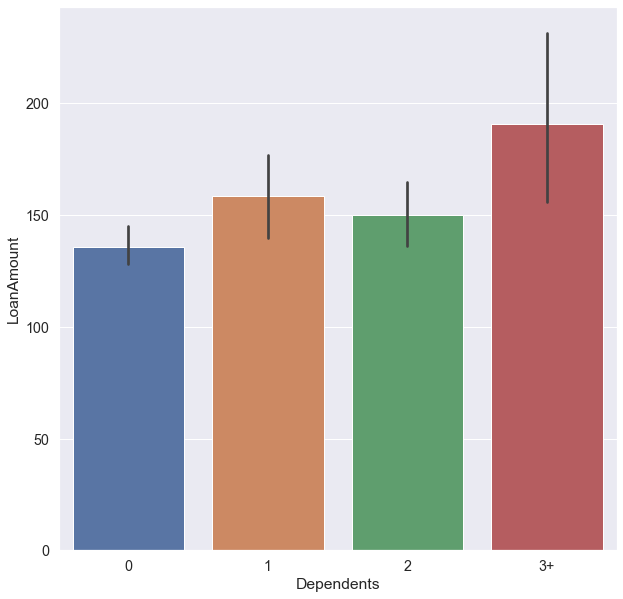

In [51]:
sns.barplot(x='Dependents',y='LoanAmount',data=df1)

#### The largest average loan amount among dependents is for people who have 3+ dependents and the least average loan amount is for people who have 0 dependents